In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
df = pd.read_csv(r'C:\Users\Admin\Documents\Đại học\DS102\Thực Hành\BTTH1\forest+fires\Data.csv')

In [50]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [51]:
# Tách dữ liệu thành đặc trưng (X) và nhãn (y)
X = df.drop(columns=['area'])
y = df['area']

In [52]:
# Chia tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
329,4,3,9,6,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0
173,4,4,9,1,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0
272,2,5,8,2,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0
497,3,4,8,2,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0
182,5,4,2,0,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,4,5,9,5,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0
106,4,5,3,4,91.4,30.7,74.3,7.5,18.2,29,3.1,0.0
270,2,2,8,2,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0
435,2,5,7,6,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0


In [59]:
y_train

329     3.33
173     3.07
272     3.09
497    14.68
182     6.38
       ...  
71      0.00
106     0.00
270     0.52
435     0.00
102     0.00
Name: area, Length: 413, dtype: float64

In [54]:
# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Dự đoán trên tập test
y_pred = model.predict(X_test)

In [56]:
# Tính toán MSE
mse = mean_squared_error(y_test, y_pred)

# Tính toán RMSE (căn bậc hai của MSE)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 11726.652395322955
RMSE: 108.28966892239977


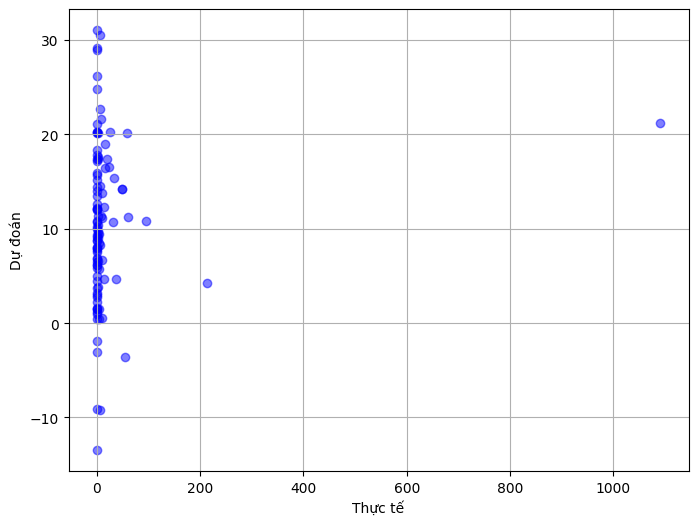

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Thực tế")
plt.ylabel("Dự đoán")
plt.grid(True)
plt.show()

Giải thích:
RMSE của bài 1(Sử dụng Numpy) khác với RMSE của bài 4(Sử dụng thư viện Sklearn) vì cách lấy dữ liệu train của hai cái là khác nhau: Numpy lấy theo thứ tự còn sklearn là lấy random